# Exercício Regressão Linear com PyTorch

Este notebook é um exercício baseado no notebook:
- [LinearRegressionIrisNumPy.ipynb](LinearRegressionIrisNumPy.ipynb) feito em NumPy,

O objetivo desse notebook é reescrevê-lo porém utilizando tensores do PyTorch.

Os nomes das funções do PyTorch são próximas das funções do Torch original escrito
na linguagem Lua, porém não são iguais.

## Importação dos pacotes

In [5]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

def print_assert(r):
    if r:
        return 'OK!'
    else:
        return 'Incorreto!'

## Dataset

### Leitura dos dados

In [6]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.size(0)
print('x_train.shape:',x_train.shape, type(x_train))
print('y_train.shape:',y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
x_train[:5]:
 
 7.0000
 6.4000
 6.9000
 5.5000
 6.5000
[torch.FloatTensor of size 5x1]

y_train[:5]:
 
 4.7000
 4.5000
 4.9000
 4.0000
 4.6000
[torch.FloatTensor of size 5x1]



### Normalização dos dados

In [7]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

### Exercício 1 - criação do `x_train_bias`

faça o `x_train_bias` ser uma matriz com zeros na primeira coluna e x_train na segunda coluna.

Dica: você pode precisar da função [torch.cat](http://pytorch.org/docs/master/torch.html#torch.cat) e [torch.ones](http://pytorch.org/docs/master/torch.html#torch.ones).

In [24]:
x_train_bias = torch.ones(50,2)
print(x_train_bias.size())

torch.Size([50, 2])


In [25]:
# Verificação do exercício - Execute para testar sua implementação

print('x_train_bias é um tensor: {}'.format(print_assert(
    isinstance(x_train_bias, torch.FloatTensor)
)))

    
print('tamanho do x_train_bias: {}'.format(print_assert(
    x_train_bias.size() == torch.Size([50, 2])
)))

print('primeira coluna é só de uns: {}'.format(print_assert(
    (x_train_bias[:, 0] - torch.ones(n_samples)).sum() == 0
)))

print('segunda coluna é igual a x_train: {}'.format(print_assert(
    (x_train_bias[:, 1] - x_train).sum() == 0
)))

x_train_bias é um tensor: OK!
tamanho do x_train_bias: OK!
primeira coluna é só de uns: OK!
segunda coluna é igual a x_train: Incorreto!


## Modelo da rede

### Definição da classe

In [26]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1,0.1) #inicialização dos parâmetros
    
    def forward(self, x_bias):
        return x_bias.matmul(torch.t(self.w))
    

### Instanciando a rede

In [27]:
model = Net(2,1)

### Testando o predict da rede

In [28]:
#model.forward(torch.ones((4,2)))
model.forward(torch.randn(4,2))


-0.1034
 0.0705
-0.0052
-0.0229
[torch.FloatTensor of size 4x1]

## Treinamento

### Exercício 2 - Treinamento

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [34]:
num_epochs = 10
learning_rate = 0.5

for epoch in range(num_epochs):
    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    #loss = np.square(y_pred - y_train).mean()
    loss = 0.1
    
    # cálculo do gradiente pelas derivadas parciais
    # w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    # model.w = model.w - learning_rate * w_grad.T

    # verbose
    if (epoch+1) % 2 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[2/10], loss: 0.100000
Epoch[4/10], loss: 0.100000
Epoch[6/10], loss: 0.100000
Epoch[8/10], loss: 0.100000
Epoch[10/10], loss: 0.100000


## Avaliação

### Predict

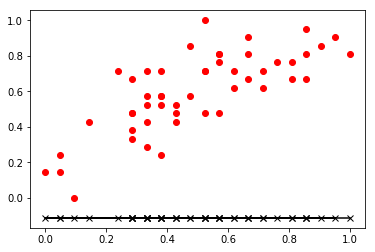

In [35]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Parâmetro treinado

In [36]:
print(model.w)


1.00000e-02 *
 -9.4204 -1.9620
[torch.FloatTensor of size 1x2]



### Valor ótimo, solução analítica

In [37]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

RuntimeError: Lapack Error getrf : U(2,2) is 0, U is singular at /Users/robertoalotufo/mylocalprojects/pytorch/aten/src/TH/generic/THTensorLapack.c:514